## Simulation of Standard Normals: 

Simulating 1000 times, 
10 draws from a random normal distribution 
arrange them in a matrix
Then with 1000 rows and 10 columns - for each row- calculate the mean
Thus each row is the mean of 10 IID draws from standard normal distributions

(sample size of n=10 is drawn 1000 times from a normal population distribution)


In [1]:
nosim <- 1000
n <- 10

sd(apply(matrix(rnorm(nosim*n),nosim),1,mean))

[1] 0.3263658

In [2]:
1/sqrt(n)

[1] 0.3162278

## Simulation of Standard Uniforms: 
Standard uniforms have variance 1/sqrt(12*n)

In [3]:
nosim <- 1000
n <- 10

sd(apply(matrix(runif(nosim*n),nosim),1,mean))

[1] 0.09119495

In [4]:
1/sqrt(12*n)

[1] 0.09128709

## Simulation of Poissons: 
Poissons 4 have a variance of 4; means of random samples of n Poisson(4) have sd 2/sqrt(n)

In [5]:
nosim <- 1000
n <- 10

sd(apply(matrix(rpois(nosim*n,4),nosim),1,mean))

[1] 0.6214017

In [6]:
2/sqrt(n)

[1] 0.6324555

## Simulation of Coin Flips

Fair coin flips have variance of 0.25, means of random samples of n coin flips have sd 1/(2*sqrt(n))

In [7]:
nosim <- 1000
n <- 10

sd(apply(matrix(sample(0:1,nosim*n, replace = TRUE),nosim),1,mean))

[1] 0.1557749

In [8]:
1/(2*sqrt(n))

[1] 0.1581139

## Simulate AR1

In [9]:
set.seed(2016); N=1000; phi=0.4;
z=rnorm(N,0,1);x=NULL;
x[1]=z[1];

for (t in 2:N){
    x[t]=z[t]+phi*x[t-1];
}

length(x)

[1] 1000

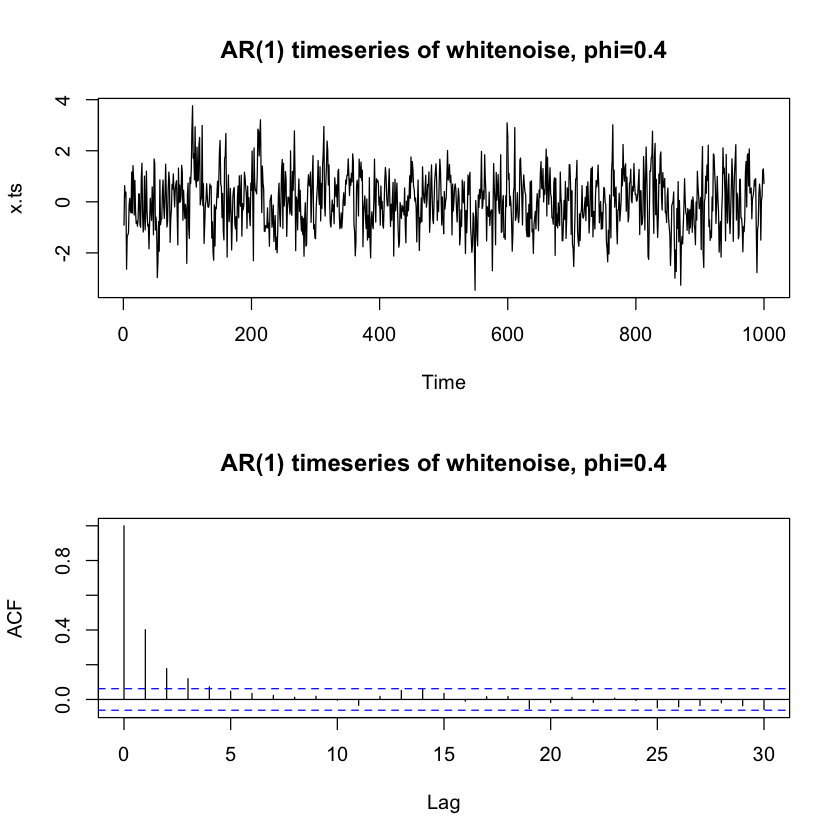

In [10]:
#create timeseries object
x.ts = ts(x)
par(mfrow=c(2,1))
plot(x.ts,main="AR(1) timeseries of whitenoise, phi=0.4")
x.acf=acf(x.ts,main="AR(1) timeseries of whitenoise, phi=0.4")

We can see in ACF that after 2 or 3 correlations, the correlations start becoming noise. But we do have fairly healthy relationship for a couple side periods.

In [11]:
set.seed(2016); N=1000; phi=1;
z=rnorm(N,0,1);x=NULL;
x[1]=z[1];

for (t in 2:N){
    x[t]=z[t]+phi*x[t-1];
}

length(x)

[1] 1000

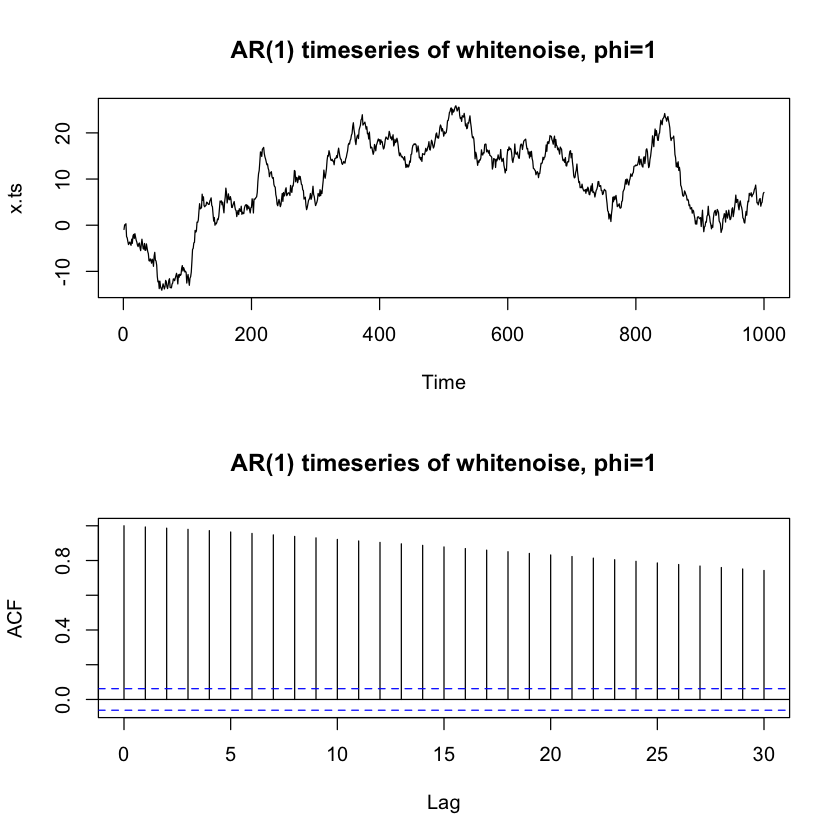

In [12]:
#create timeseries object
x.ts = ts(x)
par(mfrow=c(2,1))
plot(x.ts,main="AR(1) timeseries of whitenoise, phi=1")
x.acf=acf(x.ts,main="AR(1) timeseries of whitenoise, phi=1")

If we move to phi as 1, we just move past stationarity and also ACF is fairly constant. 
##### There is a strong dependence on history. 

## Simulate AR2 process: X_t = Z_t +0.7X_t-1+0.2X_t-2

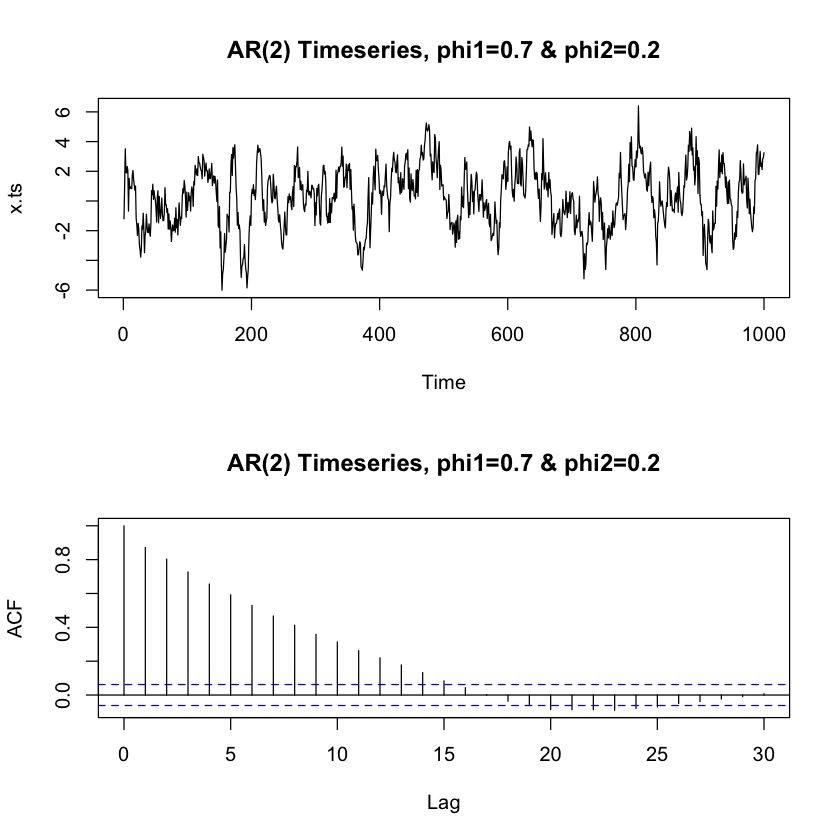

In [13]:
set.seed(2017)
x.ts = arima.sim(list(ar =c(0.7,0.2)),n=1000)
par(mfrow=c(2,1))
plot(x.ts,main="AR(2) Timeseries, phi1=0.7 & phi2=0.2")
x.acf=acf(x.ts,main="AR(2) Timeseries, phi1=0.7 & phi2=0.2")

We can see that correlations decay at a slower rate now.

## Stationarity of an AR(2) process

Stationarity -1<Phi2<1; Phi2<1+Phi1; Phi2<1-Phi1

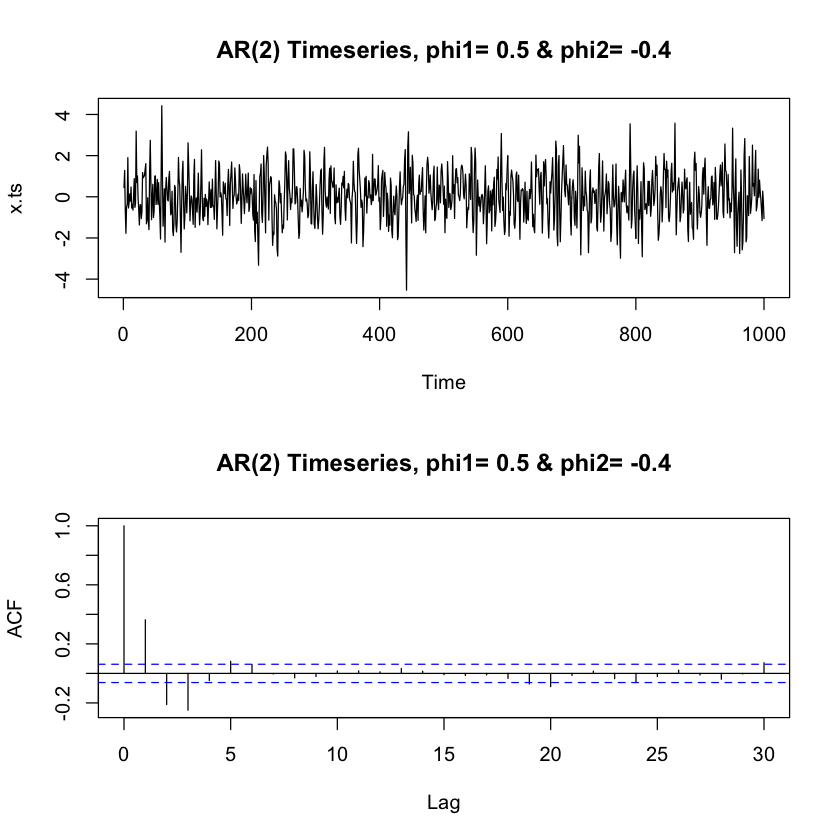

In [14]:
phi1=0.5; phi2=-0.4
set.seed(2017)
x.ts = arima.sim(list(ar =c(phi1,phi2)),n=1000)
par(mfrow=c(2,1))
plot(x.ts,main=paste("AR(2) Timeseries, phi1=",phi1,"& phi2=",phi2))
x.acf=acf(x.ts,main=paste("AR(2) Timeseries, phi1=",phi1,"& phi2=",phi2))

As phi2 is negative, we are introducing some negative correlation into our acf.

## Simulate AR2 process with PACF plot

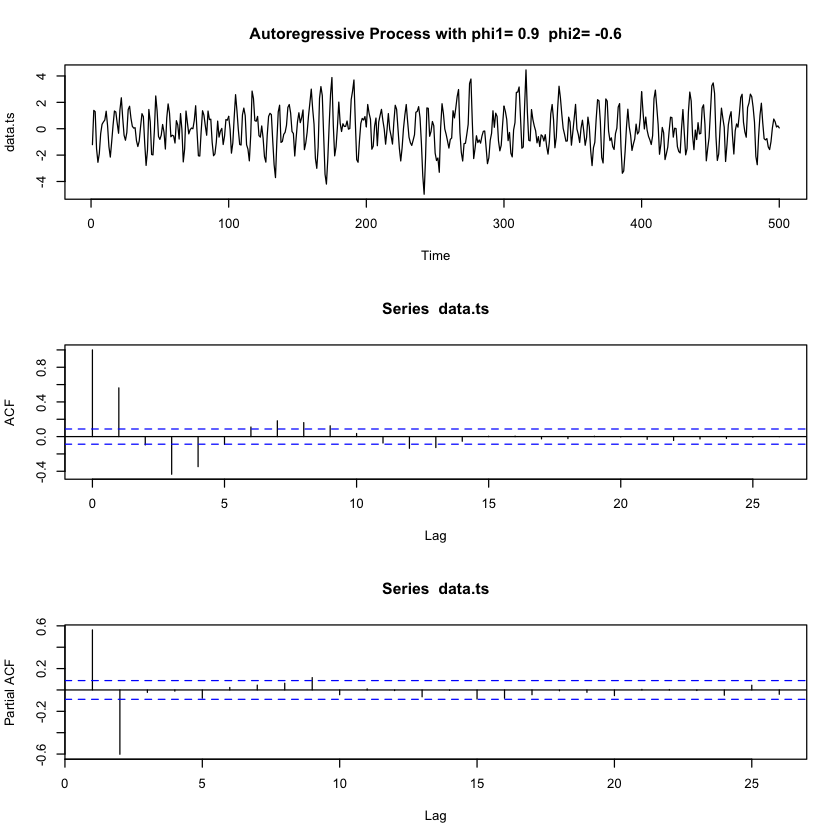

In [1]:
phi.1 = .9; phi.2 = -.6;
par(mfrow=c(3,1))
data.ts = arima.sim(n = 500, list(ar = c(phi.1, phi.2)))
plot(data.ts, 
main = 
paste("Autoregressive Process with phi1=", phi.1," phi2=",phi.2 ) ) 
acf(data.ts)
acf(data.ts, type="partial")